In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pyemma
import tol_colors as tc
import seaborn as sns
import mplhelv
from pdb3 import lsext
from tqdm.notebook import tqdm
tol_cmap = tc.tol_cmap('rainbow_PuBr')

In [2]:
weights = pickle.load(open('../remaking_MSM/2ms/weights_msm_400_80_300.pkl','rb'))
weightsc = np.concatenate(weights)

In [3]:
def gap(x):
    m = np.max(x)
    n = np.min(x)
    gap = (m-n)/14
    return gap
def free_energy_plot(x,y,xmul=1,ymul=1,weightsClassA=weights,fig_wid=10,fig_hig=7,vmax=5):
    R = 0.001987
    T = 310
    cmap = tol_cmap
    x_data = x*xmul
    y_data = y*ymul
    Max_energy = vmax
    x_bins=200
    y_bins=200
    x_data_min =  np.min(x_data)
    y_data_min =  np.min(y_data)
    x_data_max =  np.max(x_data)
    y_data_max =  np.max(y_data)
    x_hist_lim_low =  x_data_min -0.5
    y_hist_lim_low =  y_data_min -0.5
    x_hist_lim_high = x_data_max +0.5
    y_hist_lim_high = y_data_max  +0.5
    hist= np.histogram2d(x_data,y_data, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weightsClassA)
    prob_density = hist[0]
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    x_bin_size = xedge[1]-xedge[0]
    y_bin_size = yedge[1]-yedge[0]
    free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
    min_free_energy = np.min(free_energy)
    delta_free_energy = free_energy - min_free_energy
    xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
    yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]
    fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))
    #cd = axs.contourf(xx,yy,delta_free_energy.T, vmin=0.0, vmax=Max_energy,cmap=cmap)
    contours = np.linspace(0,Max_energy,Max_energy+1)
    cdl = axs.contour(xx,yy,delta_free_energy.T,levels=range(int(Max_energy)+1),colors='k',linewidths = 0.2)
    cd = axs.contourf(xx,yy,delta_free_energy.T,np.linspace(0,Max_energy,30), vmin=0.0, vmax=Max_energy,cmap=cmap)
    cbar = fig.colorbar(cd,ticks=range(int(Max_energy)+1))
    cbar.ax.set_yticklabels(range(int(Max_energy)+1),size=20)
    cbar.ax.set_ylabel('Free Energy (kcal/mol)',fontsize=20)
    xlimlow = np.min(x_data)-gap(x_data)
    ylimlow = np.min(y_data)-gap(y_data)
    xlimhigh = np.max(x_data)+gap(x_data)
    ylimhigh = np.max(y_data)+gap(y_data)
    axs.set_xlim(xlimlow, xlimhigh)
    axs.set_ylim(ylimlow, ylimhigh)
    xticks = range(int(np.ceil(x_data_min)),int(np.floor(x_data_max)+1),30)
    yticks = range(int(np.ceil(y_data_min)),int(np.floor(y_data_max)+1),2)
    axs.set_xticks(xticks)
    axs.set_xticklabels(xticks)
    axs.set_yticks(xticks)
    axs.set_yticklabels(xticks)
    axs.tick_params(axis='both',labelsize=20)
    # axs.set_yticks(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # axs.set_yticklabels(np.around(np.arange(y_lim_low,y_lim_high,2),2))
    # plt.rc('xtick', labelsize=10)
    # plt.rc('ytick', labelsize=10)
    #plt.tight_layout()
    axs.grid(True,ls='--',alpha=0.7)
    fig.show()
    return fig,axs,delta_free_energy,xx,yy

In [4]:
distI = pickle.load(open('../remaking_MSM/2ms/distI_2ms.pkl','rb'))
trajs_56 = [j for j in distI if 'U23' not in j]
trajs_56_index = [i for i,j in enumerate(distI) if 'U23' not in j]
len(trajs_56), len(weights)

(11322, 11322)

In [5]:
y = pickle.load(open('./totdist_refined_activation_final.pkl','rb'))
y_TM56 = [y[j] for j in trajs_56_index]
yc = np.concatenate(y_TM56)

In [6]:
tot = pickle.load(open('../remaking_MSM/totdist_2ms.pkl','rb'))
for tno, t in enumerate(tot):
    tot[tno] = t[:,:89]
tot_TM56 = [tot[j] for j in trajs_56_index]
totc = np.concatenate(tot_TM56)

/tmp/ipykernel_203375/527210042.py:32: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_203375/527210042.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


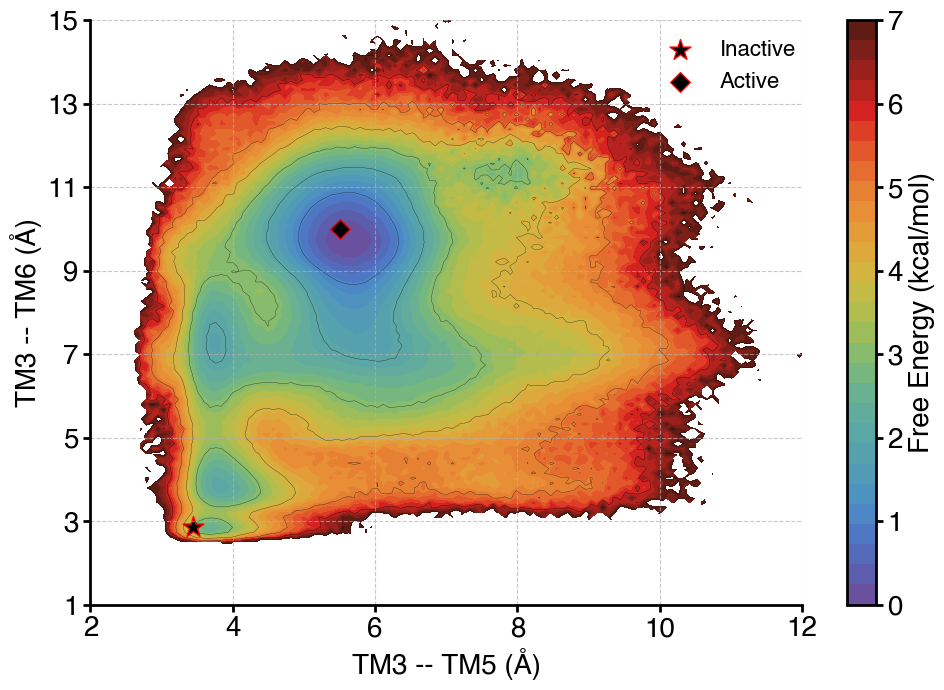

In [7]:
i=1
j=3
fig,b,x,y,fe = free_energy_plot(yc[:,i],yc[:,j],vmax=7,weightsClassA=weightsc)
# b.set_xlabel(label_dict[i],fontsize=20)
# b.set_ylabel(label_dict[j],fontsize=20)

# 3.444444444444444, 2.8617283950617285
# 5.507936507936508, 9.992592592592594
b.set_xlim(2,12)
b.set_xticks(range(2,13,2))
b.set_xticklabels(range(2,13,2))
b.set_ylim(1,15)
b.set_yticks(range(1,16,2))
b.set_yticklabels(range(1,16,2))
b.scatter(3.444444444444444, 2.8617283950617285,marker='*',color='k',s=250,edgecolors='r',label='Inactive')
b.scatter(5.507936507936508, 9.992592592592594,marker='D',color='k',s=100,edgecolors='r',label='Active')
b.legend(frameon=False,prop={'size': 16},bbox_to_anchor=(1.02,1))
b.set_ylabel('TM3 -- TM6 (Å)',fontsize=20)
b.set_xlabel('TM3 -- TM5 (Å)',fontsize=20)
b.grid(True,ls='--',alpha=0.7)
fig.tight_layout()
# fig.savefig('./updated_SMO_Activation_TM56.png',dpi=300,transparent=True)

In [8]:
xin=1
yin=3
x_data,y_data = yc[:,xin],yc[:,yin]
x_data_min =  np.min(x_data)
y_data_min =  np.min(y_data)
x_data_max =  np.max(x_data)
y_data_max =  np.max(y_data)
x_hist_lim_low =  x_data_min -0.5
y_hist_lim_low =  y_data_min -0.5
x_hist_lim_high = x_data_max +0.5
y_hist_lim_high = y_data_max  +0.5

In [9]:
x_bins,y_bins = 200,200

In [10]:
n_samples = 200
Prob_arr = np.empty([n_samples,x_bins,y_bins])
max_prob_density = np.empty(n_samples)

In [12]:
for i in tqdm(range(n_samples)):
#     print(i)
    indices = pickle.load(open(f'../remaking_MSM/2ms/bt/indices_56_{i+1}.pkl','rb'))
    x_btsp = np.concatenate([y_TM56[j] for j in indices])[:,xin]
    y_btsp = np.concatenate([y_TM56[j] for j in indices])[:,yin]
    # print(len(x_btsp)), print(len(y_btsp))
    weights_btsp = np.concatenate(pickle.load(open(f'../remaking_MSM/2ms/bt/msm_weights_btsp_56_{i+1}.pkl','rb')))
    # print(len(weights_btsp))
    hist= np.histogram2d(x_btsp,y_btsp, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weights_btsp)
    del x_btsp
    del y_btsp
    del weights_btsp
    del indices
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    max_prob_density[i] = np.max(prob_density)
    Prob_arr[i,:,:] = prob_density

  0%|          | 0/200 [00:00<?, ?it/s]

In [13]:
xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]

In [14]:
R = 0.001987
T = 310

mean_prob_density = np.mean(Prob_arr,axis=0)
err_prob_density = np.std(Prob_arr,axis=0)
err_free_energy = R*T*np.abs(np.divide(err_prob_density,mean_prob_density)- np.std(max_prob_density)/np.mean(max_prob_density))

/tmp/ipykernel_203375/1533467351.py:6: RuntimeWarning: invalid value encountered in divide
  err_free_energy = R*T*np.abs(np.divide(err_prob_density,mean_prob_density)- np.std(max_prob_density)/np.mean(max_prob_density))


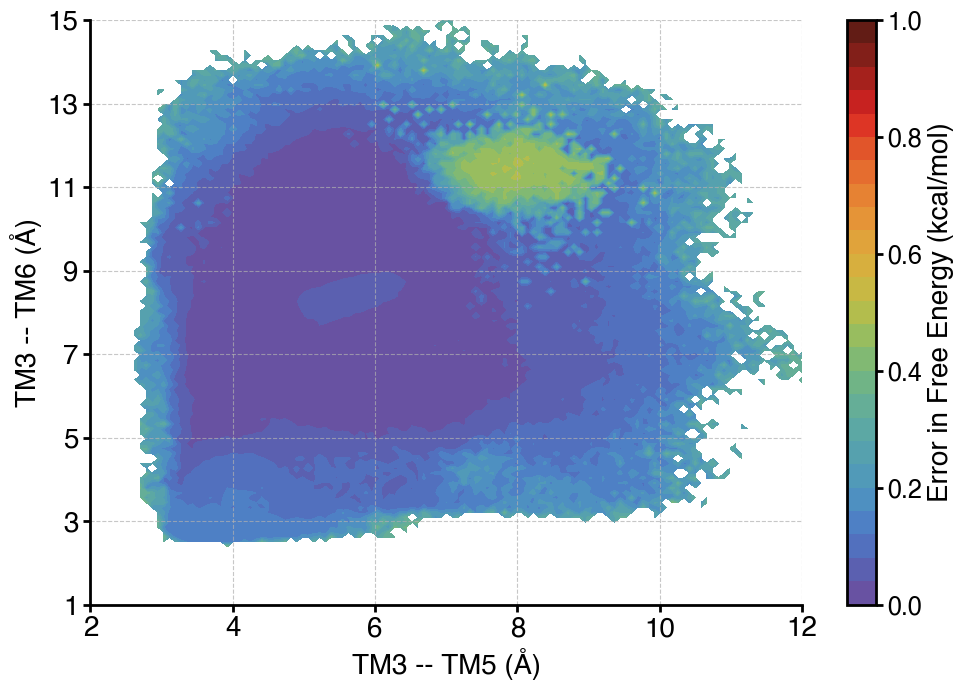

In [15]:
fig_wid=10
fig_hig=7
vmax=5
fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))

# fig,axs = plt.subplots()
Max_energy=1
cd =axs.contourf(xx,yy,err_free_energy.T,
                 np.linspace(0,Max_energy,Max_energy*25+1), vmin=0.0, vmax=Max_energy,cmap=tol_cmap)
cbar = fig.colorbar(cd,ticks=[i/5 for i in range(Max_energy*5+1)])
cbar.ax.set_yticklabels([i/5 for i in range(Max_energy*5+1)],fontsize=18)
cbar.ax.set_ylabel('Error in Free Energy (kcal/mol)',fontsize=20)
axs.set_xlim(2,12)
axs.set_xticks(range(2,13,2))
axs.set_xticklabels(range(2,13,2))
axs.set_ylim(1,15)
axs.set_yticks(range(1,16,2))
axs.set_yticklabels(range(1,16,2))
axs.set_ylabel('TM3 -- TM6 (Å)',fontsize=20)
axs.set_xlabel('TM3 -- TM5 (Å)',fontsize=20)
axs.tick_params(axis='both',labelsize=20)
axs.grid(True,ls='--',alpha=0.7)
fig.tight_layout()
# fig.savefig('./Error_updated_SMO_Activation_TM56.png',dpi=300,transparent=True)

/tmp/ipykernel_203375/527210042.py:32: RuntimeWarning: divide by zero encountered in log
  free_energy = -R*T*np.log(prob_density*x_bin_size*y_bin_size)
/tmp/ipykernel_203375/527210042.py:64: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


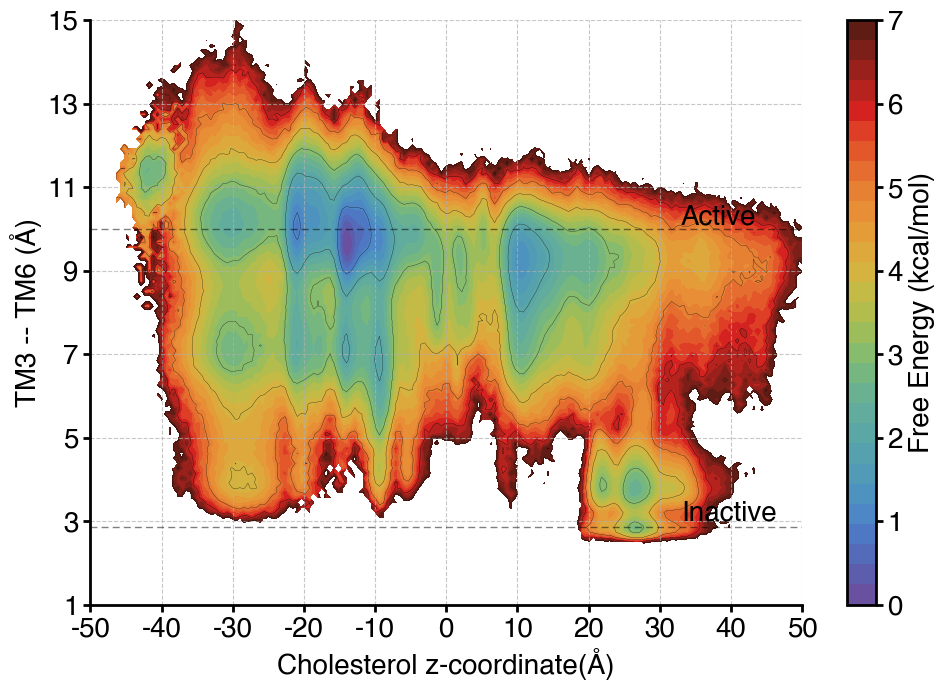

In [16]:
j=0
i=3
fig,b,x,y,fe = free_energy_plot(totc[:,j],yc[:,i],xmul=-1,vmax=7,fig_wid=10,fig_hig=7,weightsClassA=weightsc)
b.set_xlabel('Cholesterol z-coordinate(Å)',fontsize=20)
b.set_ylabel('TM3 -- TM6 (Å)',fontsize=20)
b.set_ylim(1,15)
b.set_yticks(range(1,16,2))
b.set_yticklabels(range(1,16,2))
xt = np.arange(-50,51,10)
b.set_xticks(xt)
b.set_xticklabels(xt)
b.set_xlim(-50,50)
b.axhline(9.992592592592594,color='k',linewidth=1,alpha=0.5,linestyle='--',dashes=(5, 3))
b.axhline( 2.8617283950617285,color='k',linewidth=1,alpha=0.5,linestyle='--',dashes=(5, 3))
b.text(33,3.017283950617285,'Inactive',fontsize=20)
b.text(33,10.102592592592594,'Active',fontsize=20)
b.grid(True,ls='--',alpha=0.7)
fig.tight_layout()
fig.savefig('Zcoor_vs_activation_TM56.png',dpi=300,transparent=True)

In [17]:
pwd

'/home/pdb3/SMO_CHL_Transport/6XBL_CHL/Analysis/Activation_features'

In [18]:
xin=0
yin=3
x_data,y_data = -totc[:,0],yc[:,3]
x_data_min =  np.min(x_data)
y_data_min =  np.min(y_data)
x_data_max =  np.max(x_data)
y_data_max =  np.max(y_data)
x_hist_lim_low =  x_data_min -0.5
y_hist_lim_low =  y_data_min -0.5
x_hist_lim_high = x_data_max +0.5
y_hist_lim_high = y_data_max  +0.5
x_bins,y_bins = 200,200
n_samples = 200
Prob_arr = np.empty([n_samples,x_bins,y_bins])
max_prob_density = np.empty(n_samples)

In [19]:
for i in tqdm(range(n_samples)):
    indices = pickle.load(open(f'../remaking_MSM/2ms/bt/indices_56_{i+1}.pkl','rb'))
    x_btsp = -np.concatenate([tot_TM56[j] for j in indices])[:,0]
    y_btsp = np.concatenate([y_TM56[j] for j in indices])[:,3]
    # print(len(x_btsp)), print(len(y_btsp))
    weights_btsp = np.concatenate(pickle.load(open(f'../remaking_MSM/2ms/bt/msm_weights_btsp_56_{i+1}.pkl','rb')))
    # print(len(weights_btsp))
    hist= np.histogram2d(x_btsp,y_btsp, bins=[x_bins,y_bins],
				 range = [[x_hist_lim_low,x_hist_lim_high],[y_hist_lim_low,y_hist_lim_high]],
				 density= True,weights=weights_btsp)
    del x_btsp
    del y_btsp
    del weights_btsp
    del indices
    prob_density = hist[0]
    xedge = hist[1]
    yedge = hist[2]
    max_prob_density[i] = np.max(prob_density)
    Prob_arr[i,:,:] = prob_density

  0%|          | 0/200 [00:00<?, ?it/s]

In [20]:
xx = [(xedge[i]+xedge[i+1])/2 for i in range(len(xedge)-1)]
yy = [(yedge[i]+yedge[i+1])/2 for i in range(len(yedge)-1)]

R = 0.001987
T = 310

mean_prob_density = np.mean(Prob_arr,axis=0)
err_prob_density = np.std(Prob_arr,axis=0)
err_free_energy = R*T*np.abs(np.divide(err_prob_density,mean_prob_density)- np.std(max_prob_density)/np.mean(max_prob_density))

/tmp/ipykernel_203375/4052442095.py:9: RuntimeWarning: invalid value encountered in divide
  err_free_energy = R*T*np.abs(np.divide(err_prob_density,mean_prob_density)- np.std(max_prob_density)/np.mean(max_prob_density))


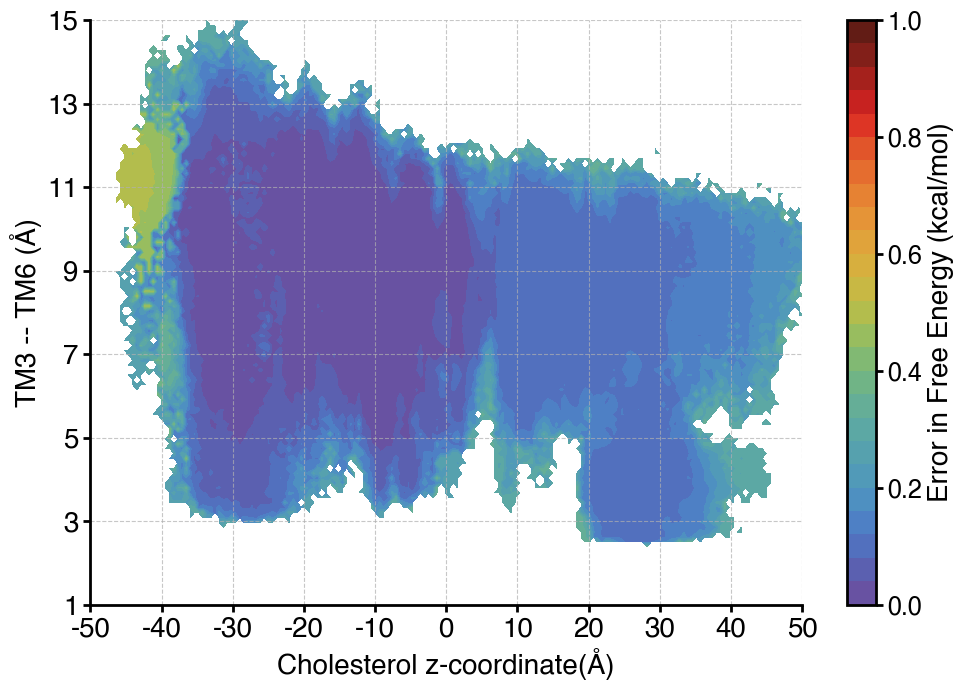

In [23]:
fig_wid=10
fig_hig=7
vmax=5
fig, axs = plt.subplots(1,1,figsize=(fig_wid,fig_hig))

# fig,axs = plt.subplots()
Max_energy=1
cd =axs.contourf(xx,yy,err_free_energy.T,
                 np.linspace(0,Max_energy,Max_energy*25+1), vmin=0.0, vmax=Max_energy,cmap=tol_cmap)
cbar = fig.colorbar(cd,ticks=[i/5 for i in range(Max_energy*5+1)])
cbar.ax.set_yticklabels([i/5 for i in range(Max_energy*5+1)],fontsize=18)
cbar.ax.set_ylabel('Error in Free Energy (kcal/mol)',fontsize=20)
axs.set_xlabel('Cholesterol z-coordinate(Å)',fontsize=20)
axs.set_ylabel('TM3 -- TM6 (Å)',fontsize=20)
axs.set_ylim(1,15)
axs.set_yticks(range(1,16,2))
axs.set_yticklabels(range(1,16,2))
xt = np.arange(-50,51,10)
axs.set_xticks(xt)
axs.set_xticklabels(xt)
axs.set_xlim(-50,50)
axs.tick_params(axis='both',labelsize=20)
axs.grid(True,ls='--',alpha=0.7)
fig.tight_layout()
fig.savefig('./Error_Zcoor_vs_activation_TM56.png',dpi=300,transparent=True)

In [22]:
# err_free_energy[np.array(xx)>0].T